Analysis 2:   
Does higher energy consumption affect life expectancy (broken down by continents)?

In [1]:
# Import Dependencies

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
# Make a reference to the csv file path
csv_path = Path("energyLEclean_NA.csv")

# Import the csv file as a DataFrame
data_df = pd.read_csv(csv_path)

# Check the df
data_df.head()

,Unnamed: 0,Location,Year,population,fossil_energy_per_capita,renewables_energy_per_capita,energy_per_capita,Record Counter,LEx,LE15,LE65,LE80
0,87,Africa,1965,321447378.0,2100.505,127.918,2228.423,27,43.4401,45.7137,11.2665,4.9844
1,88,Africa,1966,329658389.0,2136.364,139.123,2275.487,27,43.4330,45.6340,11.2447,4.9787
2,89,Africa,1967,338159967.0,2099.772,141.577,2241.349,27,43.6456,45.5410,11.2492,4.9786
3,90,Africa,1968,346980412.0,2145.930,161.394,2307.324,27,44.1023,45.8270,11.3158,4.9931
4,91,Africa,1969,356070643.0,2126.871,183.537,2310.408,27,44.3156,45.8841,11.3276,4.9919


In [14]:
# Reduce df to only columns needed for this analysis
reduced_df = data_df[["Year", "Location", "energy_per_capita", "LEx","LE15", "LE65", "LE80"]]
reduced_df.head()

,Year,Location,energy_per_capita,LEx,LE15,LE65,LE80
0,1965,Africa,2228.423,43.4401,45.7137,11.2665,4.9844
1,1966,Africa,2275.487,43.4330,45.6340,11.2447,4.9787
2,1967,Africa,2241.349,43.6456,45.5410,11.2492,4.9786
3,1968,Africa,2307.324,44.1023,45.8270,11.3158,4.9931
4,1969,Africa,2310.408,44.3156,45.8841,11.3276,4.9919


In [8]:
# Looking at 2021 by continent, country, income groupings
new_df = reduced_df[(reduced_df['Year'] == 2021)]
new_df.head()

,Year,Location,energy_per_capita,LEx,LE65
56,2021,Africa,4027.117,61.6609,12.5590
114,2021,Algeria,15914.461,76.3767,16.9190
172,2021,Argentina,21328.186,75.3899,16.6009
230,2021,Asia,18812.572,72.5321,15.9106
288,2021,Australia,61439.910,84.5265,21.6318


In [9]:
# Columns for 2021 by location 
# setting up columns for 2021 df only for LEx
LEx = new_df["LEx"]

energy_per_capita = new_df["energy_per_capita"]
x_axis = energy_per_capita

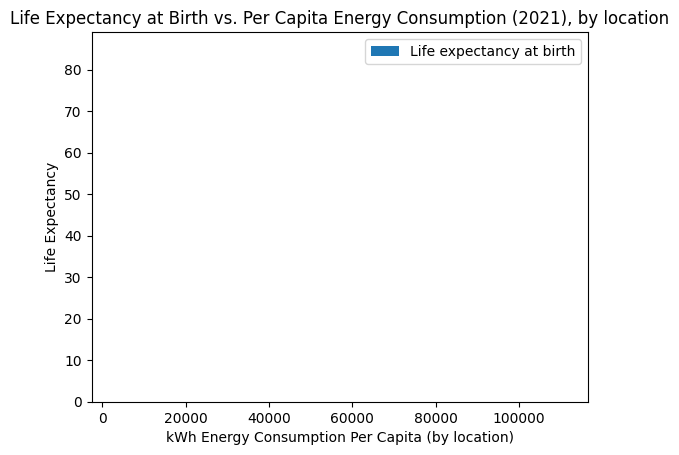

In [13]:
# graphs/plots
plt.bar(x_axis, LEx, label = "Life expectancy at birth")


plt.title("Life Expectancy at Birth vs. Per Capita Energy Consumption (2021), by location")
plt.xlabel("kWh Energy Consumption Per Capita (by location)")
plt.ylabel("Life Expectancy")

plt.legend(loc='best')